# Exercise 5
### By Gruppe H (Caroline og Maria)

In [1]:
#!pip install streamlit

In [2]:
#!streamlit hello

In [3]:
#!pip install langchain

In [4]:
#!pip install langdetect

In [5]:
#!pip install -U torch

## Set up Enviroment 

In [6]:
import os
import pandas as pd

In [7]:
import langdetect
from langdetect import DetectorFactory, detect, detect_langs

In [8]:
from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [9]:

from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate

In [10]:
# Embedding facilities
from langchain.embeddings import HuggingFaceEmbeddings

In [11]:
# Pipelines
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA

## Load Documents
Our first task is to collect and load documents from various sources and formats in the context of our chosen domain, which is **knitting for beginners**.

We have chosen to load content from pdf files, YouTube and Wikipedia.

In [12]:
import myloadlib
from myloadlib import loadDir, loadFile, loadWiki, loadYoutube, readAPI

In [13]:
import importlib 
importlib.reload(myloadlib)

<module 'myloadlib' from '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/myloadlib.py'>

In [14]:
# Collect all here
documents = []

### Load single pdf files

#### File 1
The first file we will load is a document by the University of Kentucky called "Beginning Knitting".

In [15]:
file = "./data/knitting_pdfs/knit.pdf"

In [16]:
#!pip install pypdf

In [17]:
docs = myloadlib.loadFile(file)

In [18]:
documents.extend(docs)
len(documents)

21

In [19]:
# metadata of loaded Document
docs[0].metadata 

{'source': './data/knitting_pdfs/knit.pdf', 'page': 0}

Content of page [0] = page 1. 

In [20]:
documents[0].page_content
#docs[0].page_content[:1000]
# First 1000 charactors.

' \n \nBeginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row. \n \nAll knitting comes from two kinds of stitches. One is called a "knit stitch," and the other is called a "purl stitch." There \nare several different ways or methods of knitting. Refer to directions in the pattern/instructions for explanations and types of stitches required.  \n \nKnitting can produce something useful, but the process can,  and should be, fun \nand relaxing.  The main thing is to learn to enjoy  knitting—relax while you work, \navoid a cramped position, have a good light to see by, and if your hands become tired, stop and rest a while.  \nHistory of Knitting \n \nKnitting is older than written history. No \none knows exactly when people began to knit, but we do k

#### File 2
The second pdf file is a pdf of the book "The 4-H Knitting Handbook" by Debra Proctor & Susan Haws.

In [21]:
file2 = "./data/knitting_pdfs/knitting-handbook.pdf"

In [22]:
docs = myloadlib.loadFile(file2)

In [23]:
documents.extend(docs)
len(documents)

61

In [24]:
docs[1].metadata 

{'source': './data/knitting_pdfs/knitting-handbook.pdf', 'page': 1}

In [25]:
documents[1].page_content

' 2 \nAll knitting patterns tell you the size of \nneedles you will need. Never discard your needles when you have fini shed the project.  \nIf you lose one needle and have to buy another pair the same size, keep the extra \nneedle. You never know when you may lose or break another one.   \n \n\x88    Crochet Hook  \nYou will need a crochet hook to pick \nup dropped stitches and to correct other mistakes. They also come in many sizes. Size C, or 6, is a good one for 4-ply knitting yarn. \n \n\x88    Measuring Tool  \nYou will need a measuring tool. You \ncan use a ruler, a measuring tape, or a metal measuring gauge. Be sure your \nmeasuring tool has both standard and \nmetric measurements. \n \n \n \n  \n\x88 Other helpful items: \n \nScissors  -    You will also want to \ninclude in your knitting basket a pair of small scissors (kept in a case for safety). \n \nYarn needle  -  a blunt-pointed yarn \nneedle for sewing your articles together. \n  Nail file or emery board   -  for catchy

### Load YouTube
The YouTube video we found is a step by step guide to knitting by the channel LoveCrafts. The video is called "How to Knit - for absolute BEGINNERS!".

In [26]:
url = 'https://www.youtube.com/watch?v=Zjq0MoUZqVY'
save_dir="./youtube/"

In [27]:
url

'https://www.youtube.com/watch?v=Zjq0MoUZqVY'

In [28]:
lang = 'en'

In [29]:
#!pip install youtube-transcript-api

In [30]:
#!pip install pytube

In [31]:
docs = myloadlib.loadYoutube(url, lang)

In [32]:
documents.extend(docs)
len(documents)

62

In [33]:
documents[61].type

'Document'

In [34]:
documents[61].page_content

"In, around, under and off. You'll\xa0 be dreaming this by the end. Hello knitters, i'm Marion from Lovecrafts\xa0 and I'm going to show you how to knit. Now, in this video we're going to do a\xa0little project where we start knitting\xa0from start to finish.  This is the little\xa0swatch we're going to knit. I'm going to\xa0show you how to start, how to cast on, how to knit this lovely knit stitch\xa0\xa0 and then how to cast off. So, it's everything\xa0 in one go.  Now if you learn to make one of these, you can make a scarf or a cushion cover or\xa0a pillow or a blanket - anything at all! \xa0 So, this is a really good tutorial just for some basic\xa0ground work before you start your knitting. So, I'm going to use Paint Box wool mix super chunky.\xa0And the reason i'm using a super chunky yarn\xa0\xa0 is because when you start knitting it's really\xa0important to be able to see the stitches.  Um, and so I always prefer to use a big yarn, and that way your\xa0work grows very fast, so 

### Load Wikipedia page
Lastly, we found the Wikipedia page about knitting.

In [35]:
subject = "Knitting"

In [36]:
lang = 'en'

In [37]:
#!pip install wikipedia

In [38]:
docs = myloadlib.loadWiki(subject, lang, 2)

In [39]:
documents.extend(docs)

Should be 4 at the moment, but will update everytime its run, and or other Docs/documents are ran again

In [40]:
len(documents)

64

## Chunking
After we've collected our documents, we will now be chunking them, which means breaking down the texts into smaller, more manageable chunks to prepare it for AI processing.

In [41]:
#!pip install spacy
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.0.0/en_core_web_md-3.0.0.tar.gz

In [42]:
#!pip install wordcloud

In [43]:
import myutils2
from myutils2 import chunkDocs, langDetect, wordCloud

In [44]:
import importlib 
importlib.reload(myutils2)

<module 'myutils2' from '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/myutils2.py'>

In [95]:
splits = myutils2.chunkDocs(documents, 350)  
#splits

In [46]:
len(splits)

394

In [47]:
splits[70]

Document(page_content='technique is called binding off.  \nProcedure \n \n1. Slip the first stitch  on the row off the left \nneedle onto the right  needle without \nknitting. \n \n2. Knit the next stitch very loosely. There \nare now two stitches on the right needle. \n \n3. Insert the left needle through the left \nside of the first stitch.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 9})

In [48]:
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df.sample(3)

,page_content,metadata,type
376,"(page_content, Knitting creates stitches: loop...","(metadata, {'title': 'Knitting', 'summary': 'K...","(type, Document)"
316,"(page_content, KNITTING\nHANDBOOKTHE 4-H\nBy D...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"
101,"(page_content, The increase stitch most common...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"


In [49]:
df['page_content'][0]

('page_content',
 'Beginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row.')

In [50]:
df['metadata'][0]

('metadata', {'source': './data/knitting_pdfs/knit.pdf', 'page': 0})

In [51]:
#!pip install scapy

In [52]:
#!bash
#!python3 -m spacy download en_core_web_md

### Data Visualization
To visually represent the data of our texts, we have created a word cloud. On the word cloud, we can see which words apear more frequently as they appear bigger.

In [53]:
im, longstring = myutils2.wordCloud(df, 'page_content')

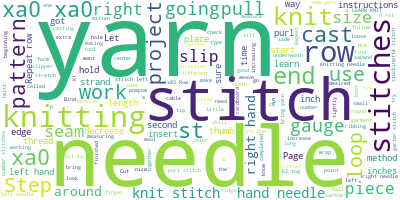

In [54]:
im

## Embeddings
We use embedding to transform the texts into vectors, which we will store in a vector database after. 

In [55]:
model_name = "sentence-transformers/all-mpnet-base-v2"
# model_name = "sentence-transformers/all-MiniLM-l6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

In [56]:
#!pip install sentence-transformers

In [57]:
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [58]:
#from langchain.vectorstores import FAISS

In [59]:
#!pip install faiss-cpu

In [60]:
#db = FAISS.from_documents(splits, embeddings)

### Storing the Embeddings in Vector Database

In [61]:
#!pip install chromadb

In [62]:
db = Chroma.from_documents(splits, embeddings)

In [63]:
persist_directory = '../data/chroma/'

# Create the vector store
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    persist_directory=persist_directory
)
vectordb.persist()

In [64]:
vectordb._collection.count()

4535

## Similarity Search
Because we have stored our texts as vectors in the vector database, we can use similarity search, since vector databases are optimized for this kind of search. We will then retrieve the most similar vectors based on the distance between them in the database.

In [65]:
query = 'what is the best yarn for beginners?'

In [66]:
answer = vectordb.similarity_search(query, k=3)
answer

[Document(page_content='Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply \nworsted hand knitting yarn is \nrecommended for beginning knitters . \n \nWhen a knitted garment is designed, the', metadata={'page': 3, 'source': './data/knitting_pdfs/knit.pdf'}),
 Document(page_content='Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply \nworsted hand knitting yarn is \nrecommended for beginning knitters . \n \nWhen a knitted garment is designed, the', metadata={'page': 3, 'source': './data/knitting_pdfs/knit.pdf'}),
 Document(page_content='Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply \nworsted hand knitting yarn is \nrecommended for beginning knitters

The answer of our question is the most similar text about yarn that is beginner friendly. For now, it seems the question is best answered in one of the documents, the pdf called 'knit.pdf'.

In [67]:
for d in answer:
    print(d.page_content)

Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply 
worsted hand knitting yarn is 
recommended for beginning knitters . 
 
When a knitted garment is designed, the
Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply 
worsted hand knitting yarn is 
recommended for beginning knitters . 
 
When a knitted garment is designed, the
Hand knitting yarn of acrylic, wool, or wool/nylon is suitable for hats, mittens, gloves, sweaters, and scarves. Because of its firm twist and medium weight, 4-ply 
worsted hand knitting yarn is 
recommended for beginning knitters . 
 
When a knitted garment is designed, the


In [68]:
for d in answer:
    print(d.metadata)

{'page': 3, 'source': './data/knitting_pdfs/knit.pdf'}
{'page': 3, 'source': './data/knitting_pdfs/knit.pdf'}
{'page': 3, 'source': '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/data/knitting_pdfs/knit.pdf'}


## Information Retrieval
We want to ask some more questions that a beginner knitter might ask to see if we can retrieve correct information. We chose to ask four questions and look at the answers, which are still based on similar words and sentences in the documents stored as embeddings in the vector database.

In [69]:
# K2tog is a knitting term
q1 = 'What does "K2tog" mean?'

In [70]:
q2 = 'What are stitch markers and how do I use them?'

In [71]:
q3 = 'How do I cast on stitches?'

In [72]:
q4 = "What's the difference between circular needles and straight needles?"

In [73]:
answer = vectordb.max_marginal_relevance_search(q1, k=2, fetch_k=5)
for d in answer:
    print(d.page_content)

• Next row: Purl    • Next row: *K3, K2 tog*, repeat from *
    • Next row: Purl
    • Next row: K2, K2 tog*, repeat from *    • Next row: Purl
    • Next row: *K1, K2 tog*, repeat from *
    • Next row: Purl    • Last row:  K2 tog, across row (15 sts.)
• Next row: Purl    • Next row: *K3, K2 tog*, repeat from *
    • Next row: Purl
    • Next row: K2, K2 tog*, repeat from *    • Next row: Purl
    • Next row: *K1, K2 tog*, repeat from *
    • Next row: Purl    • Last row:  K2 tog, across row (15 sts.)


Here, we found some text related to K2tog, but we still don't understand what the term. 

It is the same for our other questions, we can retrieve information related to our question, but it doesn't *answer* the question.

In [74]:
answer = vectordb.max_marginal_relevance_search(q2, k=2, fetch_k=5)
for d in answer:
    print(d.page_content)

30• Following 2 rows: Work even in stockinette stitch.
• Thumb Row 1: K across to the second marker; remove the marker; place the remaining 
13, (14,17, 22) sts on a stitch holder; cast on 2 sts on the right hand needle for the base of  the thumb.
• Following rows: P the 2 cast-on sts; p the next 8 (8, 12, 12) sts; remove the other marker; place
30• Following 2 rows: Work even in stockinette stitch.
• Thumb Row 1: K across to the second marker; remove the marker; place the remaining 
13, (14,17, 22) sts on a stitch holder; cast on 2 sts on the right hand needle for the base of  the thumb.
• Following rows: P the 2 cast-on sts; p the next 8 (8, 12, 12) sts; remove the other marker; place


In [75]:
answer = vectordb.max_marginal_relevance_search(q3, k=2, fetch_k=5)
for d in answer:
    print(d.page_content)

There are several methods of casting on stitches. One method is shown here. By using two yarns to cast  on, the beginning or 
edge of your work will be stronger.
There are several methods of casting on stitches. One method is shown here. By using two yarns to cast  on, the beginning or 
edge of your work will be stronger.


In [76]:
answer = vectordb.max_marginal_relevance_search(q4, k=2, fetch_k=5)
for d in answer:
    print(d.page_content)

points. Be careful with them and learn to 
use them properly. It is a good idea to put protectors on the tips when you put your 
work down. Protectors keep the points from 
sticking people and prevent stitches from slipping off  the needles. Use rubber tips made
points. Be careful with them and learn to 
use them properly. It is a good idea to put protectors on the tips when you put your 
work down. Protectors keep the points from 
sticking people and prevent stitches from slipping off  the needles. Use rubber tips made


## Large Language Model
To actually get answers, we create a LLM that will be trained on the knitting documents and prompted to give useful and concise human-like answers, which a beginner knitter can use.

In [77]:
from langchain.llms import Ollama
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

In [78]:
!ollama list

NAME          	ID          	SIZE  	MODIFIED    
mistral:latest	61e88e884507	4.1 GB	2 hours ago	
llama3:latest 	a6990ed6be41	4.7 GB	3 hours ago	


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [79]:
llm = Ollama(model="mistral", callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]))

In [80]:
# Build prompt
template = """Use the following pieces of context to answer the question at the end. 
If you don't know the answer, just say that you don't know, don't try to make up an answer. 
Use five sentences maximum. Keep the answer as concise as possible. 
Always say "thanks for asking!" at the end of the answer. 

{context}

Question: {question}

Helpful Answer:
"""

In [81]:
prompt = PromptTemplate.from_template(template)
chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt})

Now, we will ask the same questions to the LLM and see the difference in how it answers the questions.

In [82]:
question1 = 'What does "K2tog" mean?'

In [83]:
result1 = chain({"query": question1})
result1["result"]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 "K2tog" is a knitting abbreviation for "knit 2 stitches together." It involves knitting the next two stitches as if they were one, reducing the number of stitches by one. Thanks for asking!

' "K2tog" is a knitting abbreviation for "knit 2 stitches together." It involves knitting the next two stitches as if they were one, reducing the number of stitches by one. Thanks for asking!'

The LLM types out the response and now, we can see what the term K2tog actually means.

In [84]:
question2 = 'What are stitch markers and how do I use them?'

In [85]:
result2 = chain({"query": question2})

 Stitch markers are small tools used to indicate a specific point in a knitting or crocheting project. In the context provided, they mark the beginning of the thumb section in a glove pattern. To use them, you follow instructions like those given in the text: K across to the marker, remove it, place the marked stitches on a holder, and continue working with the remaining stitches. Then, when you return to the marked point, you reinsert the marker. Thanks for asking!

In the answer above, we can see how the model refers directly to the texts which we gave it for context, and again it answers the question in a concise and useful way. The same is seen for the next two questions.

In [86]:
question3 = 'How do I cast on stitches?'

In [87]:
result3 = chain({"query": question3})

 One common method for casting on stitches involves using two yarns. This technique strengthens the beginning edge of your work. To begin, hold both yarns in your hands with the working yarn at the back. Bring the second yarn to the front and insert it under the first yarn where you want your first stitch. Loop the second yarn around the first stitch and pull it through. Repeat these steps for each new stitch, making sure to keep the edge tight. Continue until you have the desired number of stitches on your needle. Thanks for asking!

In [88]:
question4 = "What's the difference between circular needles and straight needles?"

In [89]:
result4 = chain({"query": question4})

 Circular needles have a joined tip, forming a continuous loop, while straight needles have separate tips. Circular needles are ideal for knitting in the round or sewing seamless joins, whereas straight needles are used for flat projects like scarves and sweaters. Protectors on circular needle tips prevent stitches from slipping off and keep points from sticking people when work is set down (thanks for asking!).

#### Irrelevant questions
Now we wanted to ask a question that is not related to knitting at all to see if our model is able to respond that it doesn't know, or if it will make something up.

In [90]:
question5 = 'What does water taste like?'

In [91]:
result5 = chain({"query": question5})

 Water itself has no taste or flavor as it is a chemical compound made up of hydrogen and oxygen atoms. However, the taste of water can vary depending on its source and mineral content. For example, distilled water tastes flat, while mineral water may have a slightly sweet or mineral-like taste. Thanks for asking!

First, we asked what water tastes like and see that the Ollama model also contains some information beyond the knitting documents. 

So we asked another question, which should be a lot harder for the model to answer, which is "What color pants do I have on?". We expect the answer to be some form of "I don't know. Thanks for asking!".

In [92]:
question6 = 'what color pants do i have on?'

In [93]:
result6 = chain({"query": question6})

 I'm unable to determine the color of your pants based on the provided context. The text discusses various aspects of knitting, including elastic garments, splicing yarns, and working with multiple colors, but it doesn't mention anything about the color of your pants. Thanks for asking!

As expected, the answer is that the model does not know, and it also supplied some more information related to the topic of knitting.

## Task 5
For task 5 we created a streamlit application, where a user can write the path to a pdf file on their system, which the model can use as context for the question the user can input. Then, the user will receive the answer to their question when clicking the 'Get Answer' button. 

The pdf can be about any topic and so can the question, but to get the best answer, the question should relate to the document.

The full application can be found in the file app.py and can be run with the commando `streamlit run app.py`. It is important to start Ollama first and have it running in a terminal.

Below we have some screenshots from the application.


#### Relevant question
We tried to ask our little system a question about knitting after feeding it a pdf about knitting:
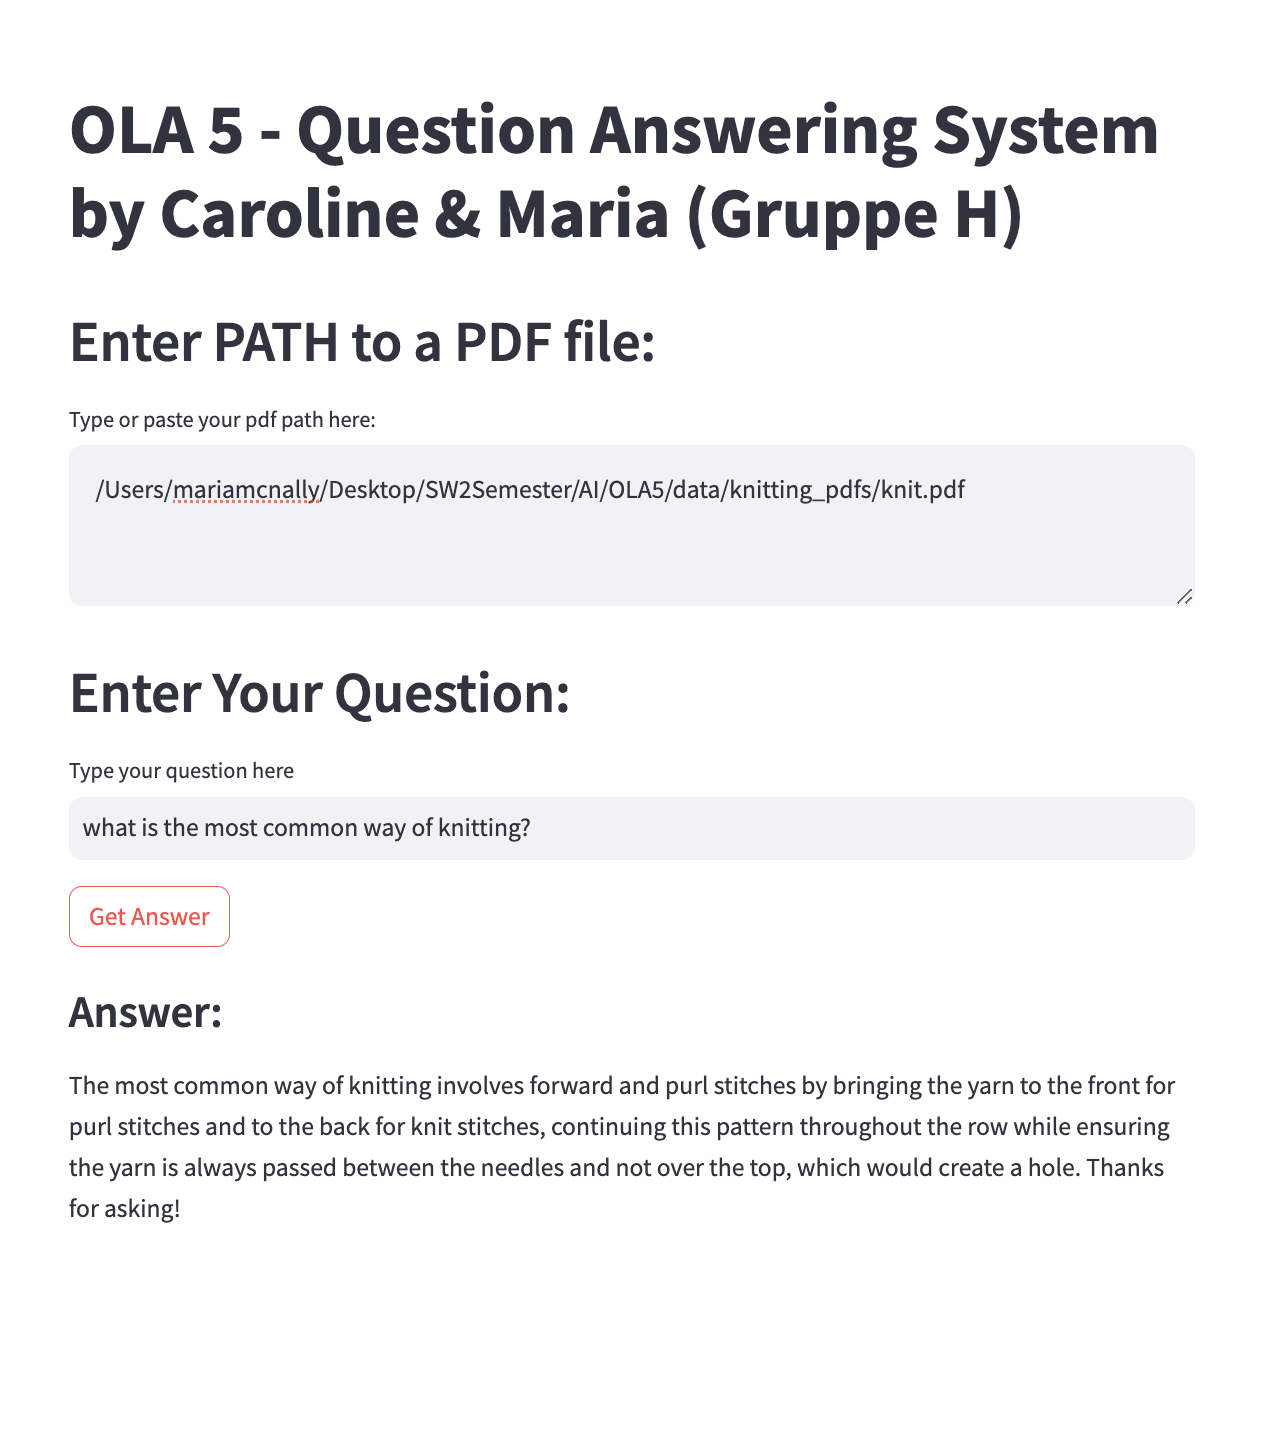

#### Not relevant question
We then tried to ask it something not related to the contents of the pdf file, which is seen below:
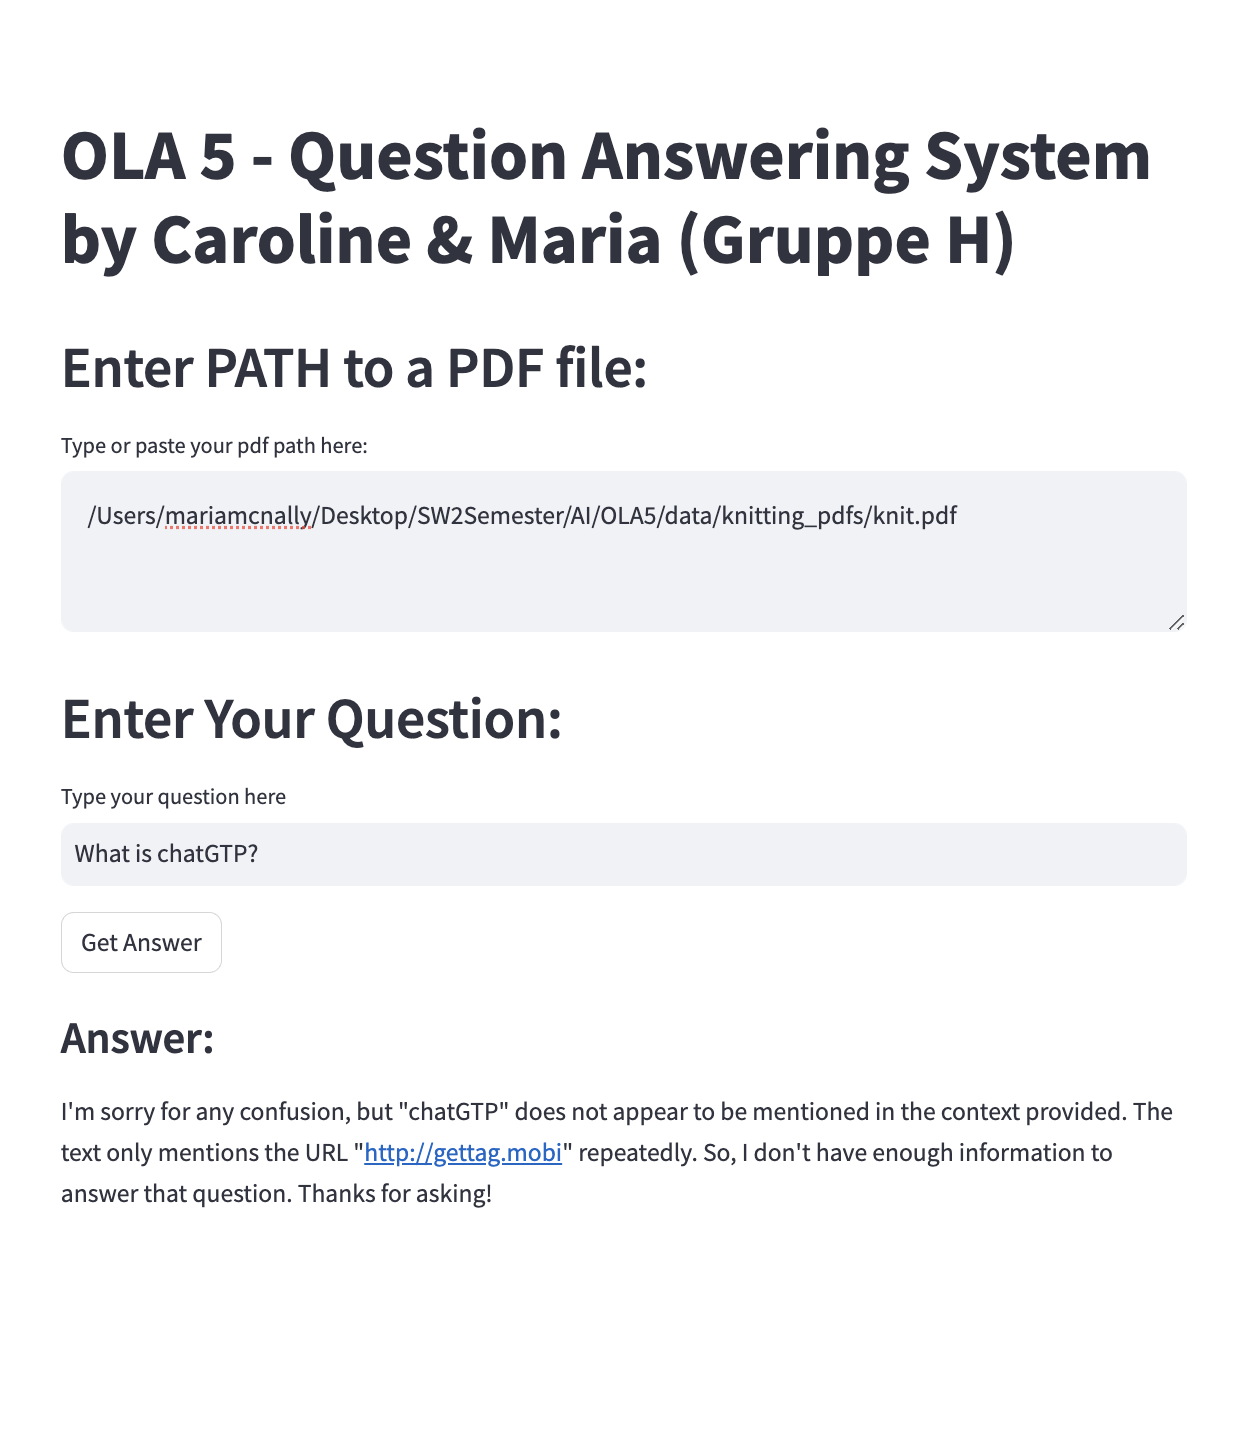

## Task 6
Since our application is just a simple prototype, it takes too long to get answers and the user can only ask one answer at a time, but if we were to continue building the program, the business value would be higher. The business implications of the full program would be similar to that of chatbots already in use, for example ChatGPT, which you (if you pay for the premium version) can also feed documents to and ask questions about the document. However, this application would be limited still to answer questions about the documents, whereas ChatGPT can answer questions on unrelated subjects. So, since there already is a market on chatbots with better capabilities, our application won't be groundbreaking.